In [ ]:
# Importing Libraries:

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis


In [ ]:
# Loading Dataset
df = pd.read_csv("/content/wine.csv")
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
x = df.iloc[:,1:]
x

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


# **Exploratory Data Analysis (EDA):**

In [ ]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
import seaborn as sns

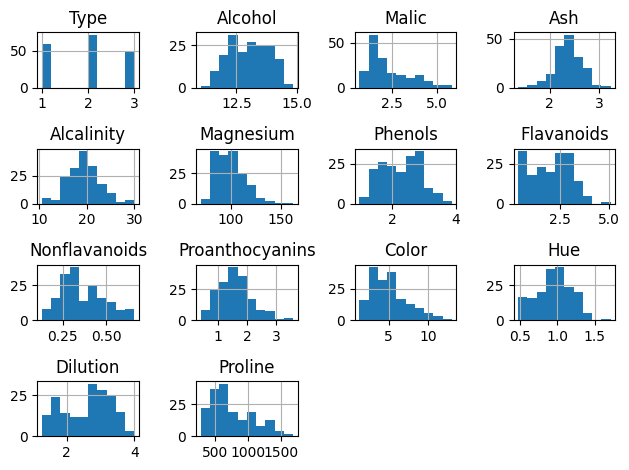

In [ ]:
df.hist()
plt.tight_layout()

<Axes: >

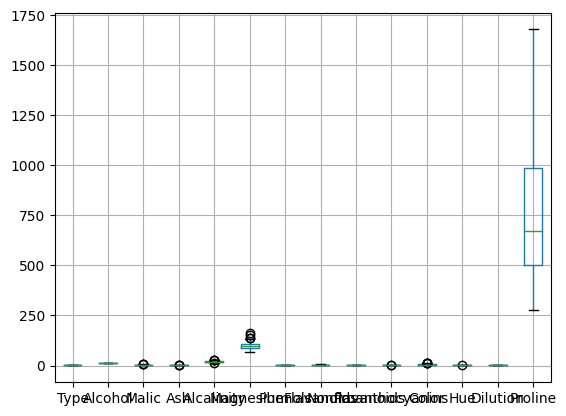

In [ ]:
df.boxplot()

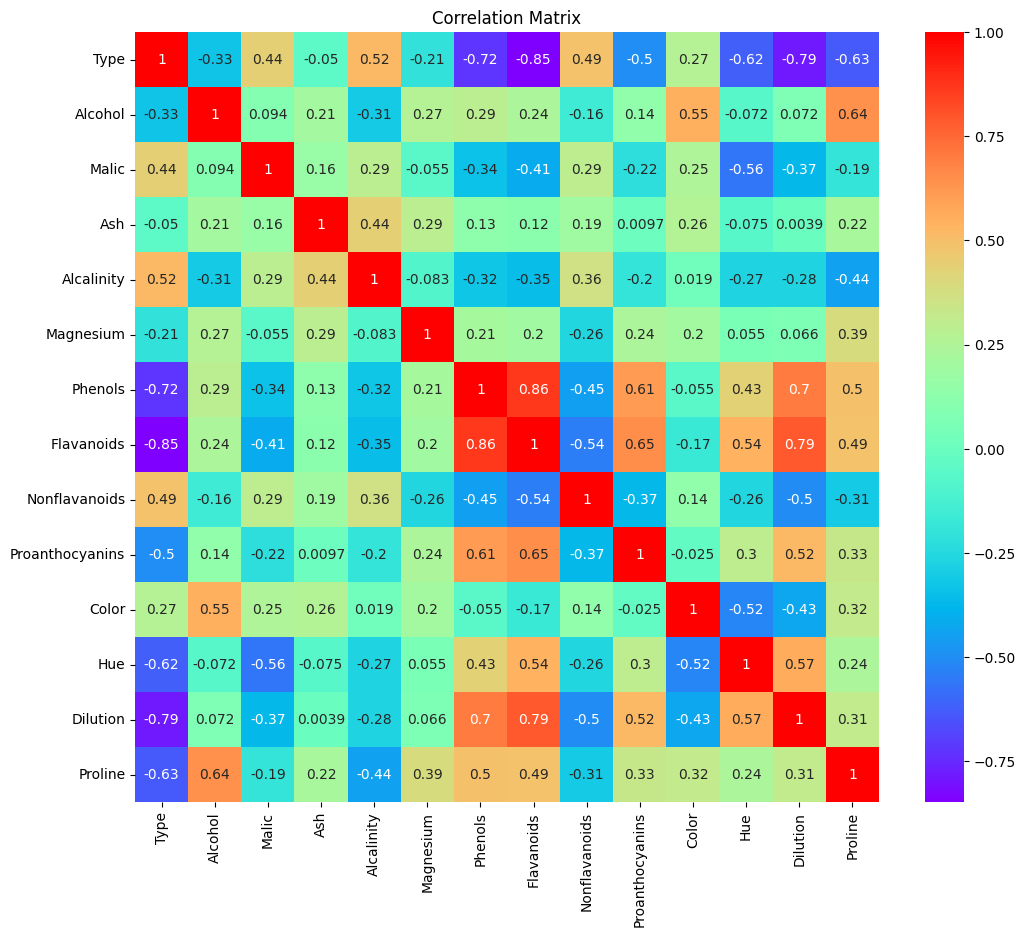

In [ ]:
# correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='rainbow')
plt.title("Correlation Matrix")
plt.show()

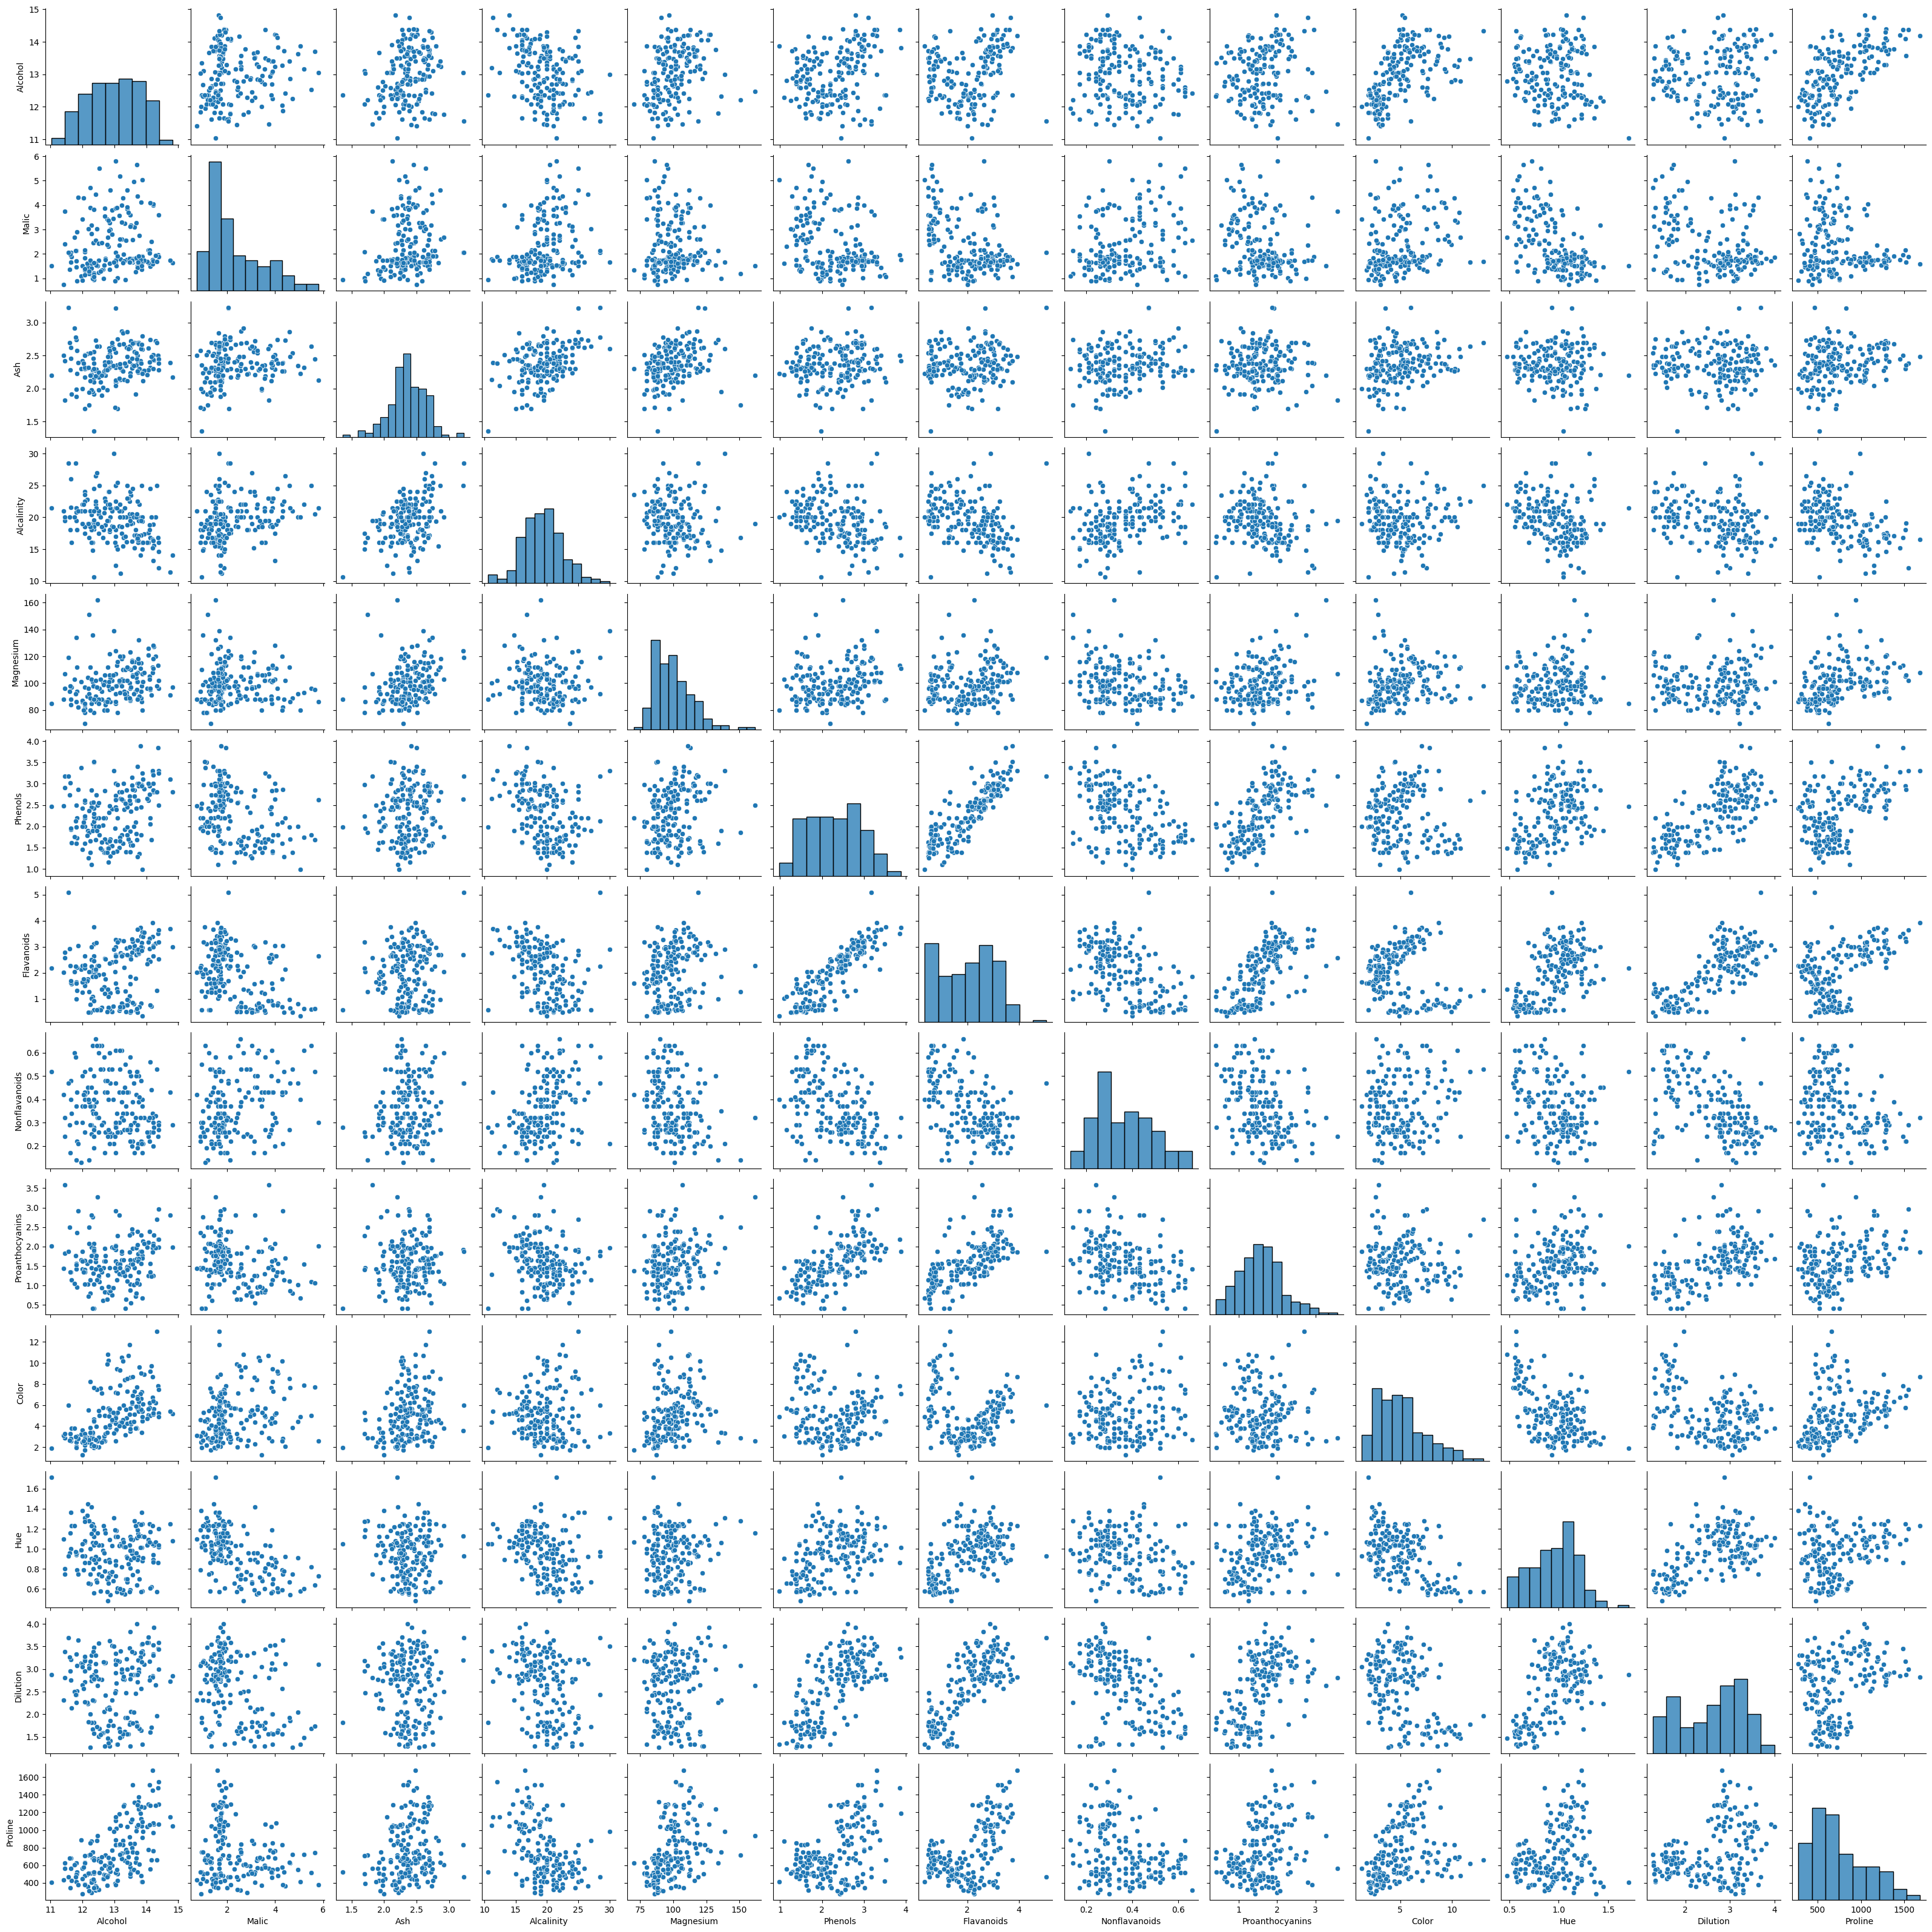

In [ ]:
sns.pairplot(x)
plt.show()

<ipython-input-14-d44277b8b60d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


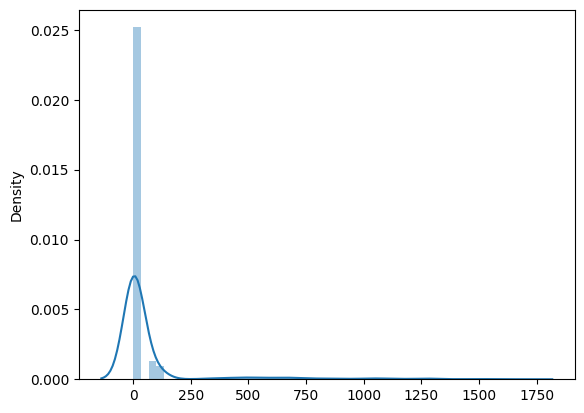

In [ ]:
sns.distplot(x)
plt.show()

In [ ]:
# applying PCA


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)

In [ ]:
scaled_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

# **Dimensionality Reduction with PCA:**

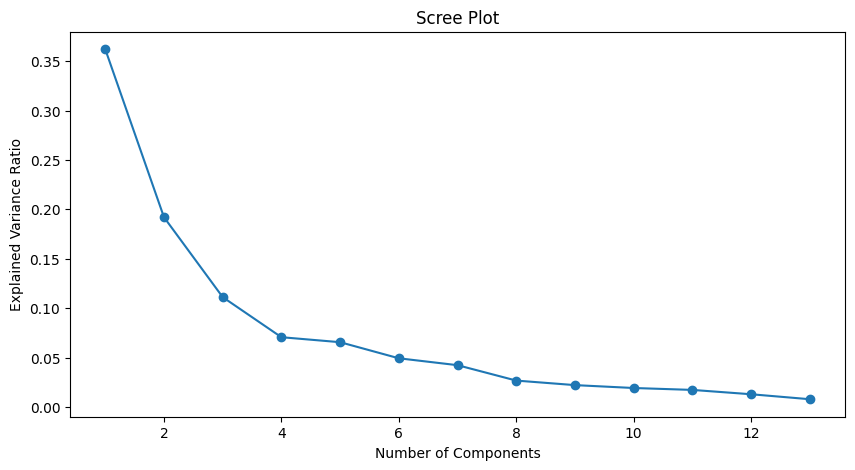

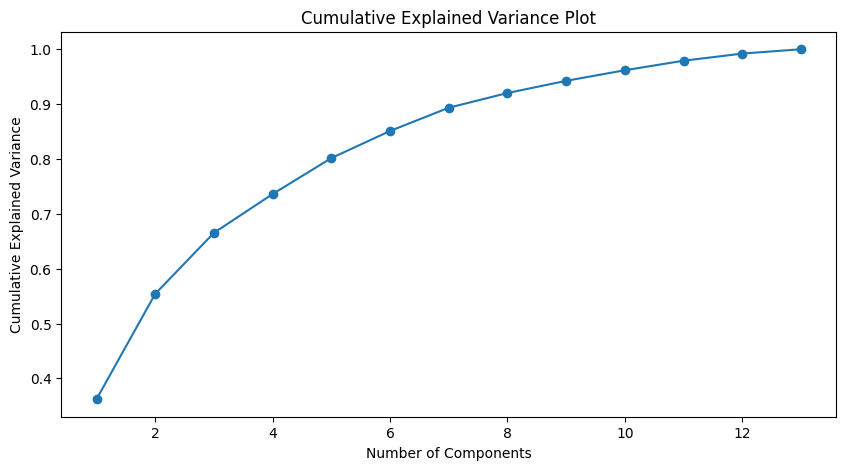

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
pca.fit(scaled_data)

# Scree plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

# Cumulative explained variance plot
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.show()


In [ ]:
# Choosing number of components based on the plots or desired explained variance

# Perform PCA transformation
pca = PCA(n_components= 5)
principal_components = pca.fit_transform(scaled_data)

# Convert the principal components into a DataFrame
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, 5 + 1)])


In [ ]:
principal_df

,PC1,PC2,PC3,PC4,PC5
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655
2,2.516740,-1.031151,0.982819,0.724902,-0.251033
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842
4,1.008908,-0.869831,2.026688,-0.409766,0.298458
...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164
174,-2.601956,-1.757229,0.207581,0.349496,0.255063
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955


# **Applying Clustering Algorithm (K-Means)**

In [ ]:
from sklearn.cluster import KMeans

# Define the number of clusters
n_clusters = 3

# Initialize the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the KMeans model to the original dataset
kmeans.fit(x)


cluster_labels = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
x

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
# Visualize the clustering results (for 2D data)
plt.scatter(x[:,0],x[:,1] ,c=cluster_labels, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=200, c='red', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.legend()
plt.show()


InvalidIndexError: (slice(None, None, None), 0)

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Silhouette score
silhouette_score_value = silhouette_score(x, cluster_labels)
print(f"Silhouette Score: {silhouette_score_value}")

# Davies–Bouldin index
davies_bouldin_score_value = davies_bouldin_score(x, cluster_labels)
print(f"Davies–Bouldin Index: {davies_bouldin_score_value}")


Silhouette Score: 0.571138193786884
Davies–Bouldin Index: 0.5342431775436286


In [ ]:
from sklearn.cluster import KMeans
n_clusters = 3
kmeans_pca = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_pca.fit(principal_df)
cluster_labels_pca = kmeans_pca.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



# **Checking with other Clustering Algorithms**


# ** Hierarchical Clustering**

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

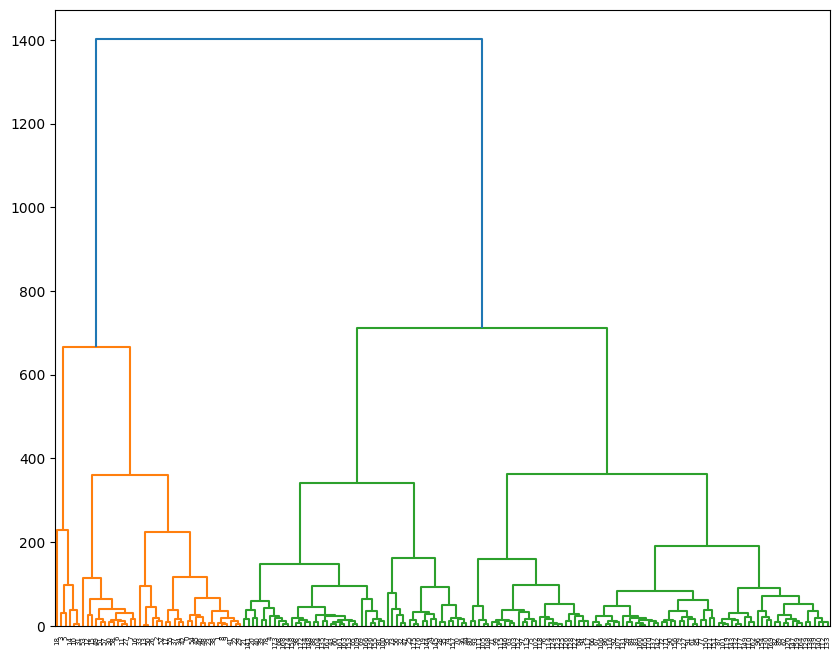

In [ ]:
plt.figure(figsize=(10,8))
dendrogram=sch.dendrogram(sch.linkage(x,'complete'))

In [ ]:
hclusters=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [ ]:

AgglomerativeClustering(n_clusters=3)

AgglomerativeClustering(n_clusters=3)

In [ ]:
y=pd.DataFrame(hclusters.fit_predict(x),columns=['clustersid'])
y['clustersid'].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


clustersid
1    72
2    58
0    48
Name: count, dtype: int64

In [ ]:
# Adding clusters to dataset
wine=x.copy()
wine['clustersid']=hclusters.labels_
wine

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clustersid
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


# **K-Means Clustering**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss=[]
for i in range (1,6):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

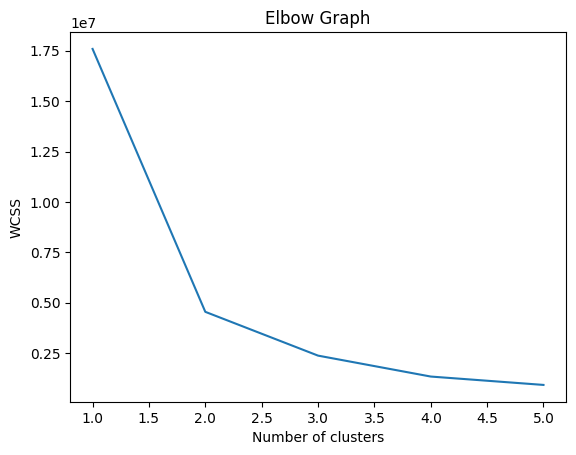

In [ ]:
plt.plot(range(1,6),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


# **Build Cluster algorithm using K=3**

In [ ]:
clusters3=KMeans(3,random_state=30).fit(x)
clusters3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=30)

In [ ]:

KMeans(n_clusters=3, random_state=30)

KMeans(n_clusters=3, random_state=30)

In [ ]:
clusters3.labels_

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 2, 1,
       2, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2], dtype=int32)

In [ ]:
# Assign clusters to the data set
wine1=wine.copy()
wine1['clusters3id']=clusters3.labels_
wine1

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clustersid,clusters3id
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2,1


In [ ]:

wine1['clusters3id'].value_counts()

clusters3id
2    69
1    62
0    47
Name: count, dtype: int64

# **Clustering with PCA Data:**

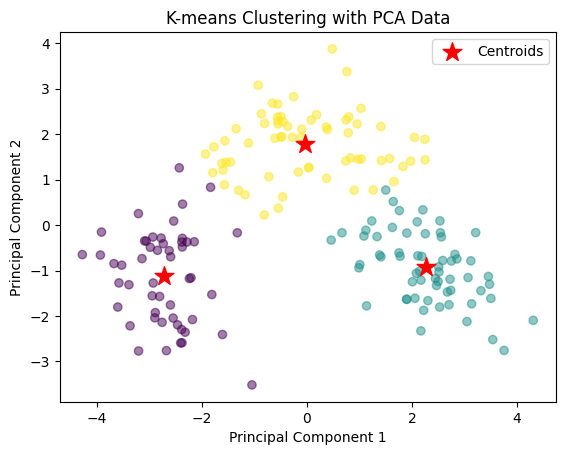

In [ ]:
# Visualize the clustering results from PCA-transformed data
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=cluster_labels_pca, cmap='viridis', alpha=0.5)
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], marker='*', s=200, c='red', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering with PCA Data')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Silhouette score for original dataset
silhouette_score_original = silhouette_score(x,cluster_labels)
print(f"Silhouette Score (Original Data): {silhouette_score_original}")

# Silhouette score for PCA-transformed dataset
silhouette_score_pca = silhouette_score(principal_df, cluster_labels_pca)
print(f"Silhouette Score (PCA Data): {silhouette_score_pca}")


Silhouette Score (Original Data): 0.571138193786884
Silhouette Score (PCA Data): 0.3690763194699231


# **Comparison of clustering results:**

# Original dataset:
Cluster labels were obtained directly from applying the clustering algorithm (e.g., K-means) to the original feature space.
Visualized clustering results using the original features.
Evaluated clustering performance metrics (e.g., silhouette score).
PCA-transformed data:
Applied the clustering algorithm to the reduced feature space obtained through PCA.
Visualized clustering results using principal components.
Evaluated clustering performance metrics (e.g., silhouette score).


# Similarities:
Both methods result in clusters with similar shapes and distributions.
In some cases, cluster centroids might be located in similar regions in the feature space.
# Differences:
The visualization of clusters might look slightly different due to the projection onto principal components.
Silhouette scores might vary between the original dataset and PCA-transformed data, indicating differences in cluster compactness and separation.
The number of clusters might be interpreted differently based on the original dataset versus PCA-transformed data.
# Impact of dimensionality reduction on clustering performance:

Dimensionality reduction techniques like PCA help in reducing the feature space's dimensionality while preserving the most important information.
PCA can help in visualizing high-dimensional data and identifying patterns that might not be easily discernible in the original feature space.
However, dimensionality reduction might lead to information loss, which can affect clustering performance.
Clustering on PCA-transformed data might result in clusters that are more easily separable or interpretable in the reduced feature space.


# Using PCA:
**Pros:**
 Reduces computational complexity, especially for datasets with a large number of features.
 Helps in visualizing high-dimensional data and identifying underlying patterns.

**Cons:**
 May lead to information loss due to dimensionality reduction.
Interpretability of clusters might be challenging in the reduced feature space.

# Clustering directly on the original dataset:
**Pros:**
No information loss due to dimensionality reduction.

Cluster interpretation might be more straightforward in the original feature space.

**Cons:**
Computational complexity might be high for datasets with a large number of features.

Visualizing clusters in high-dimensional space is challenging.



*Overall, the choice between using PCA and clustering directly on the original dataset depends on factors such as the dataset's dimensionality, computational resources, interpretability requirements, and the specific goals of the analysis. It's essential to consider these factors and choose the approach that best suits the problem at hand.*
